### Step 1: Install & Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### Step 2: Load the Dataset

In [2]:
df = pd.read_csv("transport.csv")
df.head()


,Date,Location,Weather_Condition,Temperature_C,Humidity_%,Wind_Speed_kph,Rainfall_mm,Transport_Tip
0,2022-01-01,Gweru,Windy,25.2,28.1,15.2,1.6,Secure light cargo and tarpaulins.
1,2022-01-02,Kwekwe,Thunderstorms,30.5,37.3,34.6,0.3,Monitor GPS tracking for route disruptions.
2,2022-01-03,Harare,Windy,41.1,49.0,14.9,1.1,High profile vehicles should avoid exposed hig...
3,2022-01-04,Masvingo,Thunderstorms,21.5,34.7,43.3,16.6,Monitor GPS tracking for route disruptions.
4,2022-01-05,Karoi,Thunderstorms,28.6,65.1,1.4,2.5,Suspend passenger routes through open terrain ...


### Step 3: Encode Categorical Columns

In [3]:
# Encode the transport tip (target)
tip_encoder = LabelEncoder()
df["Tip_Label"] = tip_encoder.fit_transform(df["Transport_Tip"])

# Encode the weather condition
df["Weather_Code"] = LabelEncoder().fit_transform(df["Weather_Condition"])


### Step 4: Define Features and Target

In [4]:
features = [
    "Temperature_C",
    "Humidity_%",
    "Wind_Speed_kph",
    "Rainfall_mm",
    "Weather_Code"
]

X = df[features]
y = df["Tip_Label"]


### Step 5: Split Dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 6: Train the Model

In [6]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Step 7: Evaluate the Model

Accuracy: 0.345

Classification Report:
                                                                    precision    recall  f1-score   support

  Avoid overheating — inspect engine components before departure.       0.44      0.47      0.45        15
                    Check communication systems for all vehicles.       0.18      0.14      0.16        14
                       Check coolant and tire pressure regularly.       0.14      0.10      0.12        10
                 Check wiper and tire conditions before dispatch.       0.00      0.00      0.00         7
                  Delay low-priority routes in flood-prone areas.       0.36      0.36      0.36        11
            Encourage daytime deliveries to maximize clear skies.       0.59      0.71      0.65        14
    Ensure headlights and signals are functioning for all routes.       0.40      0.44      0.42         9
             High profile vehicles should avoid exposed highways.       0.33      0.09      0.14      

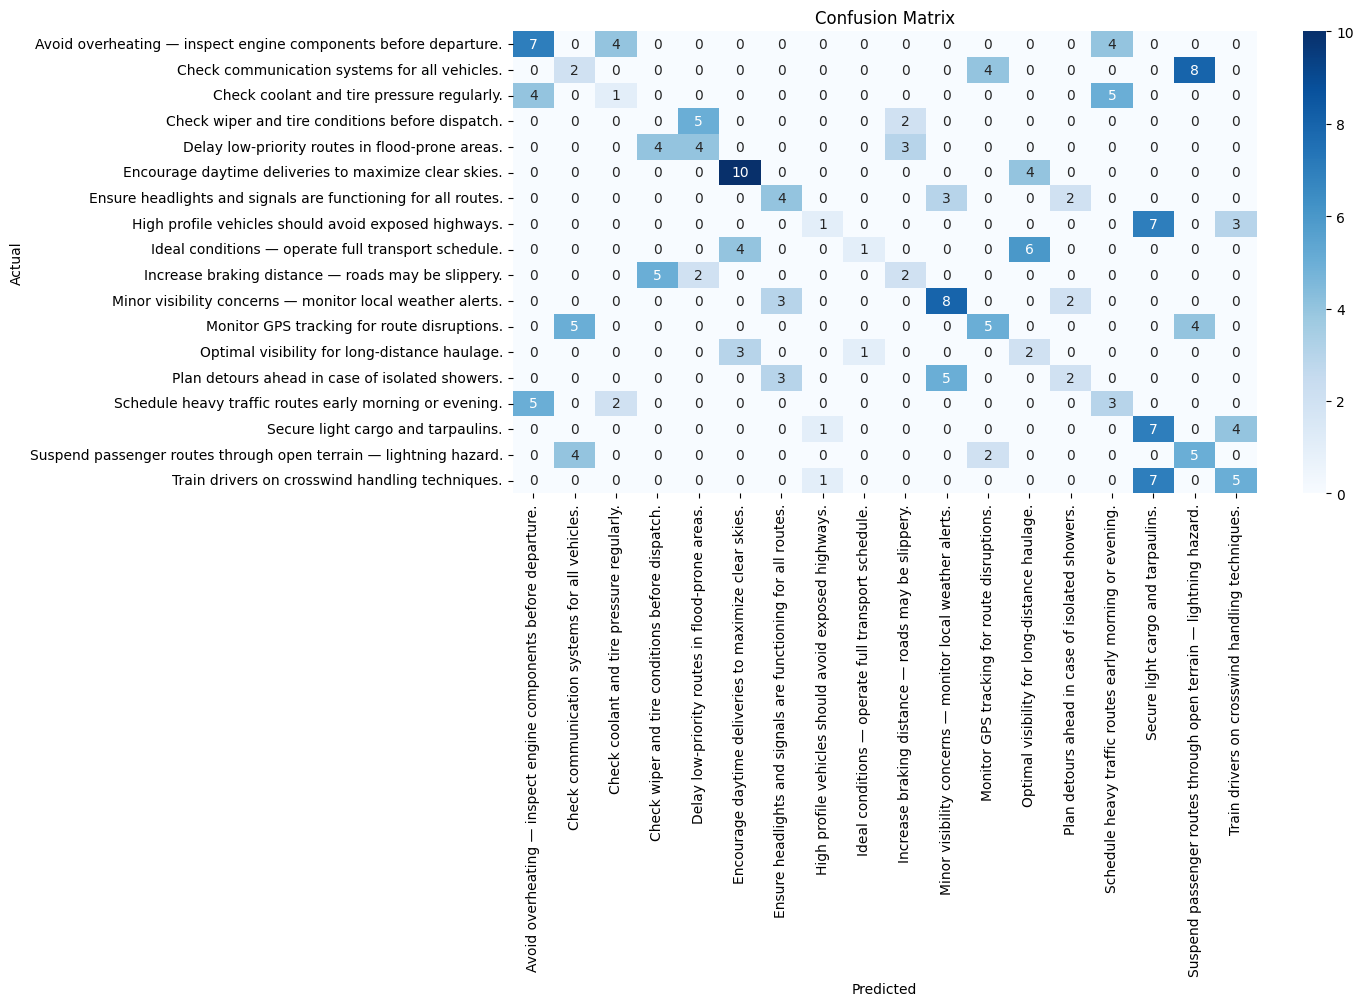

In [7]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=tip_encoder.classes_))

plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=tip_encoder.classes_, yticklabels=tip_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Step 8: Predict a Transport Tip from New Data

In [8]:
# Replace the values below with actual forecast data
sample_input = pd.DataFrame([{
    "Temperature_C": 34,
    "Humidity_%": 60,
    "Wind_Speed_kph": 25,
    "Rainfall_mm": 5,
    "Weather_Code": 2  # Use correct code for weather (e.g., 'Rain')
}])

predicted_label = clf.predict(sample_input)[0]
predicted_tip = tip_encoder.inverse_transform([predicted_label])[0]

print("✅ Recommended Transport Tip:", predicted_tip)


✅ Recommended Transport Tip: Increase braking distance — roads may be slippery.


### Step 9: Save the Model

In [9]:
import joblib

joblib.dump(clf, "transport_tip_model.pkl")
joblib.dump(tip_encoder, "transport_tip_encoder.pkl")


['transport_tip_encoder.pkl']

#### Transport Tip Prediction Script

In [10]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# === Step 1: Load the trained model and encoder ===
clf = joblib.load("transport_tip_model.pkl")
tip_encoder = joblib.load("transport_tip_encoder.pkl")

# === Step 2: Provide new weather forecast input ===
# Example input — replace values with actual forecast data
input_data = pd.DataFrame([{
    "Temperature_C": 33,
    "Humidity_%": 58,
    "Wind_Speed_kph": 22,
    "Rainfall_mm": 4,
    "Weather_Code": 2  # Replace with correct code (e.g., 2 for 'Rain')
}])

# === Step 3: Predict the tip ===
predicted_label = clf.predict(input_data)[0]
predicted_tip = tip_encoder.inverse_transform([predicted_label])[0]

# === Step 4: Output the recommendation ===
print("✅ Recommended Transport Tip:", predicted_tip)


✅ Recommended Transport Tip: Increase braking distance — roads may be slippery.
